# Replicating 3B1B Wordle Video Code

I use turtle instead of manim and try to get close to what 3b1b produced in his video on wordle

In [5]:
import turtle, random
import math
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [6]:
with open ("sgb-words.txt", "r") as myfile:
    data = myfile.read().splitlines()

In [7]:
len(data)

5757

# The game

In [8]:
class wordle:
    def __init__(self):

        turtle.tracer(False)
        self.draw_initial_squares()
        
        word_list = ['which', 'their', 'would', 'there', 'could', 'other', 'about', 'great', 'these', 'after', 'first', 'never', 'where', 'those', 'shall', 'being', 'might', 'every', 'think', 'under', 'found', 'still', 'while', 'again', 'place', 'young', 'years', 'three', 'right', 'house', 'whole', 'world', 'thing', 'night', 'going', 'heard', 'heart', 'among', 'asked', 'small', 'woman', 'whose', 'quite', 'words', 'given', 'taken', 'hands', 'until', 'since', 'light']
        answer = "great"#random.choice(word_list) # choose a random word from the list
        y = 250 # y location
        print(answer)
        
        for i in range(6): #Where the program starts
            guess_prompt = "What is guess "+str(i+1)+"?" #Makes a nice string for the prompt
            my_input = self.input_guess(guess_prompt) #calls input_guess function
            self.check_guess(my_input,answer,y)  #checks the guess
#             self.draw_initial_squares()
            y -= 65 #y down by 75
            if my_input == answer:
                turtle.penup()
                turtle.goto(-300,-200) #Always draws the congratulations in the same place
                turtle.color("black")
                turtle.write("Well Done!",font=("Verdana", 42, "normal"))
                break
                
        else: #Only runs if the for loop executes completely. i.e. You've used all your guesses.
            turtle.penup()
            turtle.goto(-300,-200)
            turtle.color("black")
#             turtle.write("Answer was: ", answer,font=("Verdana", 42, "normal"))
        turtle.done() #Needs if you are using Pycharm and some other Python editors.
        
    def draw_initial_squares(self):
        turtle.color("black")
        y = 250
        for guess in range(7):

            x = -250 # x location
            for word in range(5):
  
                turtle.penup()
                turtle.goto(x,y)
                turtle.pendown()
#                 turtle.width(4)
                turtle.fillcolor("black") #

                for i in range(4):     
                    turtle.forward(60)
                    turtle.right(90)
                turtle.penup()

                x += 65
            y -= 65

    def draw_square(self, x,y,col): # takes in x,y coordinates and a color
        turtle.penup()
        turtle.goto(x,y)
        turtle.pendown()
        turtle.fillcolor(col) # set the fillcolor
        turtle.begin_fill() 
        turtle.width(1)
        for i in range(4):     # drawing the square
            turtle.forward(60)
            turtle.right(90)
        turtle.end_fill()
        
        turtle.fillcolor("black") #
        turtle.color("black")
        turtle.width(1)
        for i in range(4):     # drawing the square
            turtle.forward(60)
            turtle.right(90)
         # ending the filling of the color
        turtle.penup()
        
        
    def input_guess(self, prompt):
        my_input = turtle.textinput("5 letter word", prompt)

        while type(my_input) != str:
            my_input = turtle.textinput("Error", "Must be a string!")

        while len(my_input) != 5:
            my_input = turtle.textinput("Error", "Must be 5 characters long!")

        while my_input not in data:
            my_input = turtle.textinput("Error", "The word must exist!")

        return(my_input)

    def check_guess(self, my_input,answer,y):
        my_input = my_input.upper()

        x = -250 # x location
        for count, i in enumerate(my_input):
            if i == answer[count].upper(): self.draw_square(x,y,"#6BAA64") #exact character match draws a green square
            elif i in answer.upper(): self.draw_square(x,y,"#C9B457") #else if character anywhere in word draws yellow
            else: self.draw_square(x,y,"#787C7F") # otherwise draws red

            x += 65 # move x coordinate along by 75
        turtle.penup() #Moves the turtle penup
        
        x = -228 #225
        for i in range(len(my_input)): #text
            turtle.goto(x, y-42) # -40
            x += 65
            turtle.color("white")
            turtle.write(my_input[i],font=("Verdana", 15, "bold")) # font verdana, size 15, normal style




In [201]:
wordle()

great


## Selecting best guess, mutual information

In [9]:
def get_match(guess, answer):
    """
    Gets the outcome of a guess
    """
    match = []
    for i, j in zip(guess, answer):
        if i in answer:
            match.append(1) # orange
        elif i == j: 
            match.append(2) # green
        else: 
            match.append(0) # gray
    return(match)

In [10]:
# all possible permutations of outcomes
perms = np.array([roll for roll in product([0, 1, 2], repeat = 5)])

In [11]:
len(perms)

243

In [12]:
def get_word_dataframe(data):
    mat = np.empty((0, 5))
    for i in range(len(data)):
        row = []
        for j in range(5):
            row.append(data[i][j])
    #     print(row)
        row = np.expand_dims(np.array(row), axis = 0)
        mat = np.append(mat, row, axis=0)

    df = pd.DataFrame(mat)
    df.to_csv("5_letter_words.csv", index = False)

In [13]:
df = pd.read_csv("5_letter_words.csv", index_col = False)
df.columns = range(5)

In [14]:
def get_words_from_match(word, match, df):
    """
    Gets the words that match the condition
    """
    subset = df.copy()
    for index, i in enumerate(match):
        if i == 0:
#             subset = subset.loc[subset[index] != word[index]]
            subset = subset.loc[(subset == word[index]).sum(axis = 1) == 0]
        elif i == 1:
            subset = subset.loc[((subset == word[index]).sum(axis = 1) >= 1) & (subset[index] != word[index])] # check if the word is in each row by summing over truth table
            # should also remove the ones where it is on the same row
            
        elif i == 2:
            subset = subset.loc[subset[index] == word[index]]
    return(subset)

In [47]:
check_guess("tares", "other")

[1, 0, 1, 2, 0]

In [48]:
d = get_words_from_match("tares",[1, 0, 1, 2, 0], df) # anagrams their

In [49]:
len(d)

24

In [51]:
check_guess("orate", "great")

[0, 2, 1, 1, 1]

In [19]:
d2 = get_words_from_match("orate", [0, 2, 1, 1, 1], d) # anagrams their

In [20]:
d2

,0,1,2,3,4


In [21]:
get_words_from_match("mates", [1,1,1,1,1], df) # anagrams with no letters on same spots

,0,1,2,3,4
361,s,t,e,a,m


In [22]:
get_words_from_match("which", [2,2,2,2,2], df) # same word

,0,1,2,3,4
0,w,h,i,c,h


In [23]:
def get_probability(word):
    """
    Get the probability of each outcome of the word with respect to each permuation
    """
    p = []
    for i in perms:
        p.append(len(get_words_from_match(word, i, df)))
    return(np.array(p)/sum(p))

In [52]:
list(initial_entropy.keys())[:10]

['ohhhh',
 'immix',
 'ahhhh',
 'gyppy',
 'yukky',
 'fuzzy',
 'pffft',
 'mamma',
 'jazzy',
 'oxbow']

In [25]:
initial_entropy["fuzzy"]

NameError: name 'initial_entropy' is not defined

In [26]:
initial_entropy["tares"]

NameError: name 'initial_entropy' is not defined

In [27]:
p = get_probability("tares")
p_ = get_probability("fuzzy")

In [28]:
# distribution of probabilities for each permutation
def plot_dist(p):
    from matplotlib import rc
    font = {'size'   : 16}
    rc('font', **font)
    plt.figure(figsize = (8,8))
    plt.bar(range(len(p)), sorted(p, reverse = True))
    plt.xlabel("Outcome")
    plt.ylabel("Probability")

In [29]:
perms[p_.argmax()]

array([0, 0, 0, 0, 0])

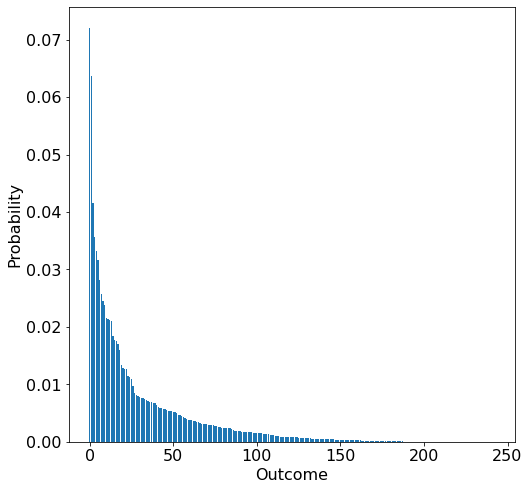

In [30]:
# plot_dist(p)
plot_dist(p)

# plt.xlim(-1, 30)

In [31]:
def calc_info(p):
    # calculate expected information (entropy)
    E = 0
    z = 0
    for i in p:
    #     print(i)
        if i != 0:
            E += i*math.log(1/i, 2)
        else:
            z+= 1
#     print(z)
    return(E)

In [32]:
calc_info(p)

6.209181059719009

## Initial Entropy

In [33]:
# value = {}
# for index, word in enumerate(data):
#     p = get_probability(word)
#     # calculate expected information
#     value[word] = calc_info(p)
    
#     if index%100 == 0:
#         print(index , "/", len(data))

In [34]:
# sorted_dict = dict(sorted(value.items(), key=lambda item: item[1]))

In [35]:
# import pickle
# with open('saved_values.pkl', 'wb') as f:
#     pickle.dump(sorted_dict, f)

## Playing a Game

In [36]:
def check_guess(guess, answer):
    ret = []
    for i, j in zip(guess, answer):
        if i == j:
            ret.append(2)
        elif i in answer:
            ret.append(1)
        else: 
            ret.append(0)
    return(ret)

In [37]:
check_guess("tares", "found")

[0, 0, 0, 0, 0]

In [38]:
# Answer is found
answer = "found"

In [39]:
initial_entropy = pickle.load(open("saved_values.pkl", "rb"))

<BarContainer object of 10 artists>

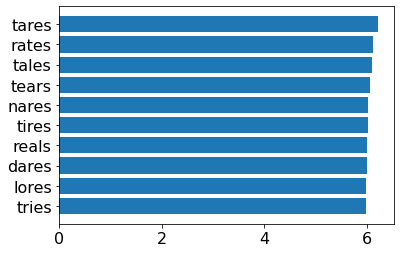

In [40]:
plt.barh(list(initial_entropy.keys())[-10:], list(initial_entropy.values())[-10:])

In [41]:
def compute_entropy_dict(data):
    value = {}
    for index, word_vec in enumerate(data.iterrows()):
        word = "".join(word_vec[1].values)
        p = get_probability(word)
        # calculate expected information
        value[word] = calc_info(p)

#         if index%100 == 0:
#             print(index , "/", len(data))
    return(value)

In [42]:
record = {"Iter":[], "N": [], "Guess":[], "Entropy": []}

In [43]:
def play_wordle(answer, log, df = df):
    index = 0
    converge = False
    record = {"Iter":[], "N": [], "Guess":[], "Entropy": []}

    while converge == False:
        
        if index == 0:
            guess = list(initial_entropy.keys())[-1]
            max_e = list(initial_entropy.values())[-1]
        elif index == 1:
            v = "".join([str(i) for i in vec])
            if v in list(log.keys()):
                guess = log[v][0]
                max_e = log[v][1]
            else:
                entropy = compute_entropy_dict(df) # compute entropy for remaining
                guess = max(entropy, key=entropy.get)
                max_e = max(entropy.values())
                log[v] = [guess, max_e]
        else:
            entropy = compute_entropy_dict(df) # compute entropy for remaining
            guess = max(entropy, key=entropy.get)
            max_e = max(entropy.values())
        
        record["Iter"].append(index)
        record["N"].append(len(df))
        record["Guess"].append(guess)
        record["Entropy"].append(max_e)

        
        if guess == answer:
            converge = True
            print("Success!")
            break
        
        else:
            vec = check_guess(guess, answer)
            N = len(df)
            df = get_words_from_match(guess, vec, df) 
            N_after =  len(df)
        
        print("Iteration: ", index,"Guess:", guess, "words before guess:", N, "after:", N_after, "uncertainty:", round(math.log(N, 2), 2), "info:", round(math.log(N, 2) - math.log(N_after, 2), 2), "entropy: ", round(max_e, 2))

        index += 1
    return(record, log)

In [ ]:
_, _ = play_wordle("found", log)

Iteration:  0 Guess: tares words before guess: 5757 after: 415 uncertainty: 12.49 info: 3.79 entropy:  6.21
Iteration:  1 Guess: doily words before guess: 415 after: 10 uncertainty: 8.7 info: 5.38 entropy:  4.75
Iteration:  2 Guess: pound words before guess: 10 after: 5 uncertainty: 3.32 info: 1.0 entropy:  4.52
Iteration:  3 Guess: mound words before guess: 5 after: 4 uncertainty: 2.32 info: 0.32 entropy:  4.46
Iteration:  4 Guess: hound words before guess: 4 after: 3 uncertainty: 2.0 info: 0.42 entropy:  4.44
Iteration:  5 Guess: bound words before guess: 3 after: 2 uncertainty: 1.58 info: 0.58 entropy:  4.38
Success!


In [47]:
word_list = ['which', 'their', 'would', 'there', 'could', 'other', 'about', 'great', 'these', 'after', 'first', 'never', 'where', 'those', 'shall', 'being', 'might', 'every', 'think', 'under', 'found', 'still', 'while', 'again', 'place', 'young', 'years', 'three', 'right', 'house', 'whole', 'world', 'thing', 'night', 'going', 'heard', 'heart', 'among', 'asked', 'small', 'woman', 'whose', 'quite', 'words', 'given', 'taken', 'hands', 'until', 'since', 'light']
        

In [205]:
len(word_list)

50

In [48]:
df.shape

(5757, 5)

In [134]:
records = []
# log = {}
    
for i in word_list:
    print(i)
    word_record, log = play_wordle(i, log)
    word_record["word"] = [i]*len(word_record["Iter"])
    records.append(word_record)

which
Iteration:  0 Guess: tares words before guess: 5757 after: 415 uncertainty: 12.49 info: 3.79 entropy:  6.21
Iteration:  1 Guess: doily words before guess: 415 after: 13 uncertainty: 8.7 info: 5.0 entropy:  4.75
Iteration:  2 Guess: cuing words before guess: 13 after: 1 uncertainty: 3.7 info: 3.7 entropy:  4.12
Success!
their
Iteration:  0 Guess: tares words before guess: 5757 after: 14 uncertainty: 12.49 info: 8.68 entropy:  6.21
Iteration:  1 Guess: tenor words before guess: 14 after: 1 uncertainty: 3.81 info: 3.81 entropy:  5.36
Success!
would
Iteration:  0 Guess: tares words before guess: 5757 after: 415 uncertainty: 12.49 info: 3.79 entropy:  6.21
Iteration:  1 Guess: doily words before guess: 415 after: 3 uncertainty: 8.7 info: 7.11 entropy:  4.75
Iteration:  2 Guess: could words before guess: 3 after: 2 uncertainty: 1.58 info: 0.58 entropy:  4.63
Iteration:  3 Guess: mould words before guess: 2 after: 1 uncertainty: 1.0 info: 1.0 entropy:  4.55
Success!
there
Iteration:  0 

In [50]:
# import pickle
# with open('records.pkl', 'wb') as f:
#     pickle.dump(records, f)
# with open('log.pkl', 'wb') as f:
#     pickle.dump(records, f)

In [55]:
records = pickle.load(open("records.pkl", "rb"))

In [ ]:
records[0]

{'Iter': [0, 1, 2, 3],
 'N': [5757, 415, 13, 1],
 'Guess': ['tares', 'doily', 'cuing', 'which'],
 'Entropy': [6.209181059719009,
  4.749092791119546,
  4.118309002821026,
  3.053463825276465],
 'word': ['which', 'which', 'which', 'which']}

In [127]:
N = []
for i in records:
    N.append(len(i["Iter"])+1)

In [128]:

num, count = np.unique(N, return_counts=True)

Text(0.5, 0, 'Number of guesses')

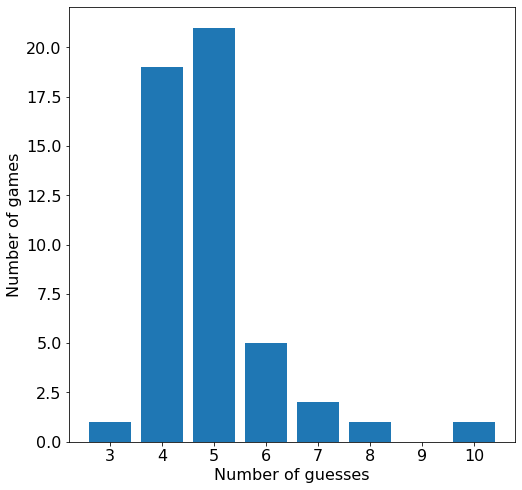

In [195]:
import seaborn as sns
plt.figure(figsize = (8,8))
plt.bar(num, count)
plt.ylabel("Number of games")
plt.xlabel("Number of guesses")

In [130]:
np.mean(N)

4.92

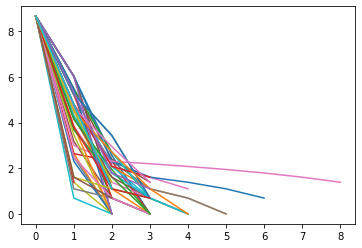

In [55]:
for i in records:
    plt.plot(np.log(i["N"]))

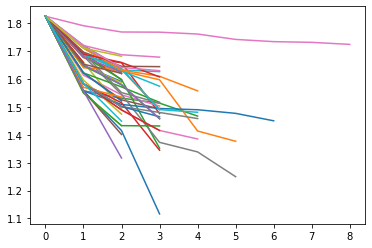

In [56]:
for i in records:
    plt.plot(np.log(i["Entropy"]))

In [45]:
def wordle_bot(df = df):

    index = 0
    converge = False
    record = {"Iter":[], "N": [], "Guess":[], "Entropy": []}
    
    while converge == False:
        
        if len(df) == 5757:
            guess = list(initial_entropy.keys())[-1]
            max_e = list(initial_entropy.values())[-1]
        else:
            entropy = compute_entropy_dict(df) # compute entropy for remaining
            guess = max(entropy, key=entropy.get)
            max_e = max(entropy.values())
        
        
        print("Iteration: ", index, ", possible words before guess:", len(df), ", current guess:", guess, ", entropy: ", max_e)
        record["Iter"].append(index)
        record["N"].append(len(df))
        record["Guess"].append(guess)
        record["Entropy"].append(max_e)
        
        vec = input("Enter vector:")
        vec = [int(i) for i in vec]
        if vec == [2,2,2,2,2]:
            converge = True
            print("Success!")
        
        else:
            df = get_words_from_match(guess, vec, df) 
        
        index += 1
    return(record)

In [46]:
wordle_bot(df)

Iteration:  0 , possible words before guess: 5757 , current guess: tares , entropy:  6.209181059719009


Enter vector: 10120


Iteration:  1 , possible words before guess: 24 , current guess: liter , entropy:  5.446025725144603


Enter vector: 00122


Iteration:  2 , possible words before guess: 2 , current guess: other , entropy:  4.942638316235849


Enter vector: 22222


Success!


{'Iter': [0, 1, 2],
 'N': [5757, 24, 2],
 'Guess': ['tares', 'liter', 'other'],
 'Entropy': [6.209181059719009, 5.446025725144603, 4.942638316235849]}

In [56]:
record_dict = {}
for record in records:
    record_dict[record["word"][0]] = record

In [53]:
class wordle:
    def __init__(self):


        
        word_list = ['which', 'their', 'would', 'there', 'could', 'other', 'about', 'great', 'these', 'after', 'first', 'never', 'where', 'those', 'shall', 'being', 'might', 'every', 'think', 'under', 'found', 'still', 'while', 'again', 'place', 'young', 'years', 'three', 'right', 'house', 'whole', 'world', 'thing', 'night', 'going', 'heard', 'heart', 'among', 'asked', 'small', 'woman', 'whose', 'quite', 'words', 'given', 'taken', 'hands', 'until', 'since', 'light']
#         answer = "great"#random.choice(word_list) # choose a random word from the list
        for answer in word_list:
            turtle.tracer(False)
            self.draw_initial_squares()
            y = 250 # y location
            print(answer)

            for i in range(6): #Where the program starts
                guess_prompt = "What is guess "+str(i+1)+"?" #Makes a nice string for the prompt
#                 my_input = self.input_guess(guess_prompt) #calls input_guess function
                my_input = record_dict[answer]["Guess"][i]

                self.check_guess(my_input,answer,y)  #checks the guess
    #             self.draw_initial_squares()
                y -= 65 #y down by 75
                if my_input == answer:
                    turtle.penup()
                    turtle.goto(-300,-200) #Always draws the congratulations in the same place
                    turtle.color("black")
    #                 turtle.write("Well Done!",font=("Verdana", 42, "normal"))
                    turtle.clear()
                    turtle.reset()
#                     turtle.bye()
                    break

            else: #Only runs if the for loop executes completely. i.e. You've used all your guesses.
                turtle.penup()
                turtle.goto(-300,-200)
                turtle.color("black")
                turtle.write("Answer was: ", answer,font=("Verdana", 42, "normal"))
#             turtle.done() #Needs if you are using Pycharm and some other Python editors.
        turtle.bye()
    
    def draw_initial_squares(self):
        turtle.color("black")
        y = 250
        for guess in range(7):

            x = -250 # x location
            for word in range(5):
  
                turtle.penup()
                turtle.goto(x,y)
                turtle.pendown()
#                 turtle.width(4)
                turtle.fillcolor("black") #

                for i in range(4):     
                    turtle.forward(60)
                    turtle.right(90)
                turtle.penup()

                x += 65
            y -= 65

    def draw_square(self, x,y,col): # takes in x,y coordinates and a color
        turtle.penup()
        turtle.goto(x,y)
        turtle.pendown()
        turtle.fillcolor(col) # set the fillcolor
        turtle.begin_fill() 
        turtle.width(1)
        for i in range(4):     # drawing the square
            turtle.forward(60)
            turtle.right(90)
        turtle.end_fill()
        
        turtle.fillcolor("black") #
        turtle.color("black")
        turtle.width(1)
        for i in range(4):     # drawing the square
            turtle.forward(60)
            turtle.right(90)
         # ending the filling of the color
        turtle.penup()
        
        
    def input_guess(self, prompt):
        my_input = turtle.textinput("5 letter word", prompt)

        while type(my_input) != str:
            my_input = turtle.textinput("Error", "Must be a string!")

        while len(my_input) != 5:
            my_input = turtle.textinput("Error", "Must be 5 characters long!")

        while my_input not in data:
            my_input = turtle.textinput("Error", "The word must exist!")

        return(my_input)

    def check_guess(self, my_input,answer,y):
        my_input = my_input.upper()

        x = -250 # x location
        for count, i in enumerate(my_input):
            if i == answer[count].upper(): self.draw_square(x,y,"#6BAA64") #exact character match draws a green square
            elif i in answer.upper(): self.draw_square(x,y,"#C9B457") #else if character anywhere in word draws yellow
            else: self.draw_square(x,y,"#787C7F") # otherwise draws red

            x += 65 # move x coordinate along by 75
        turtle.penup() #Moves the turtle penup
        
        x = -228 #225
        for i in range(len(my_input)): #text
            
            turtle.tracer(True)
            turtle.goto(x, y-42) # -40
            x += 65
            turtle.color("white")
            turtle.write(my_input[i],font=("Verdana", 15, "bold")) # font verdana, size 15, normal style
            turtle.tracer(False)




In [ ]:
wordle()

which
their
would
there
could
other
about
great
these
after
